<a name="top"> <h1>00. EDA</h1> <a>

<p>Payments Fraud Practice<br />
<strong>Aprendizaje Autom&aacute;tico</strong><br />
<strong>Master Universitario en Ciencia de Datos</strong></p>

<p>&nbsp;</p>

<p style="text-align:right">Antonio Nogués Podadera (<em>antonio.nogues@cunef.edu</em>)</p>
<p style="text-align:right">V&iacute;ctor Viloria V&aacute;zquez (<em>victor.viloria@cunef.edu</em>)</p>


<hr style="border:1px solid gray">

### Estructura

[0. Introducción](#introduccion) 

   - Objetivo de negocio

[1. Librerias utlizadas y entorno](#librerias) 

   - Importación de librerias.
   - Importación de funciones.

[2. Tratamiento de datos](#tratamiento) 

   - Importación de datos
   - Análisis de tipos de datos
   - Diccionario de datos
   - Variable Objetivos


[3. Análisis EDA](#analisis) 

   - Nombramiento de datos y aspéctos éticos 
   - Análisis de valores duplicados
   - Análisis de valores nulos
   - Análisis de variables categóricas y numéricas
   - Análisis de Outliers


[4. Exportación del dataset transformado](#exportacion)

<hr style="border:1px solid gray">

# <a name="introduccion"> 0. Introducción <a> 

La finalidad de esta práctica es la realización de una análisis exploratorio y realizar pruebas con diferentes modelos  de datos para el **dataset _"Payments_fraud"_**, con el objetivo de lograr un mayor entendimiento de los datos y posteriormente realizar un tratamiento y estimación de los diferentes modelos.

La prueba de diferentes modelos nos permitirá ver las diferencias que existen entre ellos y poder quedarnos con el que nos conceda un mejor resultado

**En este notebook unicamente se explicará el objetivo de negocio y se realizará un análisis descriptivo de los datos.**

## 0.1 Objetivo de negocio

Desde el punto de vista de una empresa de pagos, deberemos mediante el dataset `Copia de Original_dataset_payments_fraud.csv` **predecir la posibilidad de que exista fraude en cada una de las transacciones realizadas**.

<hr style="border:1px solid gray">

# <a name="librerias"> 1. Librerias utilizadas y entorno. <a>


 Cargamos las librerias a utilizar:

In [1]:
# Library import: 
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split 
import sys
import category_encoders as ce


Para la realización de esta práctica, se ha utilizado un entorno específico para la asignatura de Aprendizaje Automático: 'machin_learning'.

In [2]:
# Verification of the environment: machine_learning
! conda info


     active environment : machine_learning
    active env location : C:\Users\vvict\anaconda3\envs\machine_learning
            shell level : 2
       user config file : C:\Users\vvict\.condarc
 populated config files : C:\Users\vvict\.condarc
          conda version : 22.9.0
    conda-build version : 3.21.8
         python version : 3.9.12.final.0
       virtual packages : __cuda=11.1=0
                          __win=0=0
                          __archspec=1=x86_64
       base environment : C:\Users\vvict\anaconda3  (writable)
      conda av data dir : C:\Users\vvict\anaconda3\etc\conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https

## 1.1. Importación de funciones

Importamos las funciones que vamos a utilizar durante el EDA.

In [3]:
from aux_functions import *

# <a name="tratamiento"> 2. Tratamiento de datos <a>

## 2.1. Importación de datos

Para comenzar con el tratamiento de los datos vamos a proceder a **cargar el dataset** del archivo `Copia de Original_dataset_payments_fraud.csv` utilizando 'pandas' 

In [4]:
# Selection of the relative path where the .csv is found. Converted into a pandas df called 'payments_df'

payments_df = pd.read_csv('../data/raw/Copia_de_Original_dataset_payments_fraud.csv', sep=';')

Comprobamos el nº de filas y de columnas del dataset:

In [6]:
# Verification of the shape of 'payments_df'.

print("El DF payments_df contiene " + str(payments_df.shape[0]) +" filas y " + str(payments_df.shape[1]) + " columnas")

El DF payments_df contiene 1048575 filas y 19 columnas


Todos los datos necesarios para la práctica vienen incluidos en `payments_df`, por lo que **no será necesario cargar ningún otro df**.

## 2.2. Análisis de tipos de datos

En este apartado procederemos a analizar el tipo de dato inicial que contiene cada variable.

In [7]:
# Verification of the different types of data in the 'payments_df'.

print(payments_df.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index())

# Print the type of data for each variable.

payments_df.dtypes 

  feature_type  count
0        int64      6
1      float64      5
2       object      8


step                  int64
type                 object
amount              float64
gender               object
device               object
connection_time      object
nameOrig             object
race                 object
oldbalanceOrg       float64
age                   int64
newbalanceOrig      float64
zone                 object
user_number           int64
nameDest             object
user_connections      int64
security_alert        int64
oldbalanceDest      float64
newbalanceDest      float64
isFraud               int64
dtype: object

Observando las variables, nos damos cuenta de que **la variable `connection_time` es tipo objeto, por lo que cambiaremos su formato a float y le cambiaremos a formato decimal**, para que se ajuste con el resto de los datos.

In [8]:
# Transform the decimal format of the variable 'connection_time' by replacing to dots.
# Transform the data type converting it as float.

payments_df = payments_df.assign(**{'connection_time': lambda df: df['connection_time'].str.replace(',', '.').astype(float)})

Por otro lado, **pasaremos a clase 'object' aquellas variables categóricas que tengan otro formato**:

In [9]:
# Transform the categorical variables 'security_alert', 'isFraud' as object.

payments_df = (payments_df
    .assign(**{'security_alert': lambda df: df['security_alert'].astype(object)})
    .assign(**{'isFraud': lambda df: df['isFraud'].astype(object)})
              )

## 2.3. Diccionario de datos


Junto al dataset venía incluido un diccionario de datos `VariablesFinales.txt` con la descripción de cada variable, que se puede encontrar en el directorio `data/Raw`.

Sin embargo, **para un mayor entendimiento de los datos he procedido a crear un diccionario nuevo, llamado `Dictionary_processed.md` que se encuentra en el directorio `data/Processed`**. En el encontramos información detallada de cada una de las variables: Nombre, descripción, tipo de variable, tipo de dato y valores.



En cuanto al contenido de los datos, disponemos de una selección de transacciones realizadas y nos encontramos con 19 variables que proveen información del perfil de la persona que ha emitido la transacción.  

Nos encontramos con dos tipos de variables:

- **Variables Categóricas (8)** . El significado de cada valor se puede encontrar en `Dictionary_processed.md`.
- **Variables Numéricas (11)** .

Analizamos el **nº de valores distintos que adquiere cada variable**, para tenerlo en cuenta en el diccionario.

In [10]:
uniqueValues = payments_df.nunique()
print('Número de valores distintos en cada variable :')
print(uniqueValues)

Número de valores distintos en cada variable :
step                     95
type                      5
amount              1009606
gender                    3
device                    3
connection_time     1047989
nameOrig            1048317
race                      3
oldbalanceOrg        415945
age                      96
newbalanceOrig       466415
zone                      3
user_number            4942
nameDest             449635
user_connections         10
security_alert            2
oldbalanceDest       603920
newbalanceDest       446071
isFraud                   2
dtype: int64


## 2.4. Variable Objetivo

La variable objetivo del dataset es el valor **`isFraud`**, la cual indica si en la transaccion se ha cometido fraude o nos. La variable toma valor de **1 en el caso de haberse cometido fraude** y de **0 en el caso de no existir fraude**. 

In [11]:
# Verification that the distinc values of 'isFraud' are between 0 and 1.

print(payments_df.isFraud.unique())

[0 1]


In [12]:
# Select the values of training to check the proportion of the target objective

classes_overview(df = payments_df, obj_val = 'isFraud')

,index,porcentaje,isFraud
0,0,99.89109,1047433
1,1,0.10891,1142


Observamos que de los datos analizados donde  un 99.89% de las transacciones no cometen fraude, mientras que unicamente un 0.11% cometen fraude. **La variable objetivo está desbalanceada, por lo que lo tendremos en cuenta para la selección del modelo**.

# <a name="analisis"> 3. Análisis EDA <a>

En este apartado **se realizará el estudio exploratorio de los datos pertenecientes al dataset  `payments_df`**. Para este análisis, nos centraremos en todo el dataset, de manera que en caso de realizar una transformación se aplique a todo el conjunto.

## 3.1. Nombramiento de datos y aspéctos éticos

El nombre de las diferentes variables es muy claro, lo cual permite trabajar fácilmente con ellos, por lo que **no las renombraremos.**

En primer lugar **procedemos a eliminar las variables `race` (describe la raza de la persona que emite la transacción) dado que por motivos éticos no debemos incluirlas en el modelo**. 

In [13]:
# To drop the non ethical variable 'race'

payments_df = payments_df.drop(['race'],axis = 'columns')

Comprobamos que se haya eliminado la variable observando la nueva estructura del dataframe `payments_df`:

In [14]:
# Print the current shape of 'payments_df' without the 'race' variable.

print("El DF payments_df contiene " + str(payments_df.shape[0]) +" filas y " + str(payments_df.shape[1]) + " columnas")

El DF payments_df contiene 1048575 filas y 18 columnas


En segundo lugar dado que **las variables `nameOrig` y `nameDest`numericamente no proporcionan mucha información nos quedaremos con su primera letra para identificar el tipo de cliente**.

In [15]:
# Loop to input the first letter of each row from the 'nameOrig' variable.
letter_orig = []
for row in payments_df.nameOrig:
    letter_orig.append(row[0])
    
# Loop to input the first letter of each row from the 'nameDest' variable.   
letter_dest = []
for row in payments_df.nameDest:
    letter_dest.append(row[0])
    
# Substitution of the ID's from  'nameOrig', 'nameDest' for their first letter. 
payments_df['nameOrig'] = letter_orig
payments_df['nameDest'] = letter_dest

## 3.3 Análisis de valores duplicados

Realizamos el análisis de valores duplicados, comprobando si existe alguna fila duplicada. En caso positivo nos mostrará el nº de filas duplicadas.

In [16]:
# Save in 'payments_df_duplicated' the duplicated rows.

payments_df_duplicated = payments_df[payments_df.duplicated()]

# Print the number of duplicated rows in 'payments_df_duplicated' 

print('Hay un número de '+str(len(payments_df_duplicated))+ " valores duplicados en el dataset 'payments_df'")

Hay un número de 0 valores duplicados en el dataset 'payments_df'


**No hay valores duplicados, por lo que podemos continuar con el análisis**

## 3.4. Análisis de valores nulos

### 3.4.1 Análisis de valores nulos por filas y columnas

En este apartado procederemos a analizar el nº de valores nulos de cada variable por columnas y filas y entender su significado.

In [17]:
#Sum the number of nulls values of the different columns and rows, then the data is sorted from highest to lowest.

pd_series_null_columns = payments_df.isnull().sum().sort_values(ascending=False)
pd_series_null_rows = payments_df.isnull().sum(axis=1).sort_values(ascending=False)

# Create two dataframes showing the null values and proportion of payments_df in rows and columns.

pd_null_columnas = pd.DataFrame(pd_series_null_columns, columns=['Valores nulos en columnas'])     
pd_null_filas = pd.DataFrame(pd_series_null_rows, columns=['Valores nulos en filas'])  
pd_null_columnas['porcentaje'] = pd_null_columnas['Valores nulos en columnas']/payments_df.shape[0]*100 
pd_null_filas['porcentaje_filas']= pd_null_filas['Valores nulos en filas']/payments_df.shape[1]

**Análizamos el número de valores nulos en filas y proporción:**

In [18]:
# Show the number of null values in the rows and the proportion.

(pd_null_filas[pd_null_filas['Valores nulos en filas']>0].value_counts()).sort_values(ascending=False)

Valores nulos en filas  porcentaje_filas
1                       0.055556            254642
2                       0.111111             28205
3                       0.166667              1020
dtype: int64

Observamos como en el **5.5% de las filas hay al menos una variable con valor nulo**, en el **11.11%, al menos 2 variables nulas** y en el **16.6% hasta 3 variables con valores nulos**,que es lo máximo, 

**Mostramos las variables con valores nulos en columnas y proporción:**

In [19]:
# Show the variables with more than 0 null values in columns.

pd_null_columnas[pd_null_columnas['Valores nulos en columnas']>0]

,Valores nulos en columnas,porcentaje
gender,105118,10.024843
device,104580,9.973536
zone,104414,9.957705


Observamos la existencia de aproximadamente un **10 % de valores nulos en las variables `device`, `gender` y `zone`**. **Esto se puede deber a varios motivos**:

   - `device` : Es probable que el sistema no haya podido detectar el dispositivo por el que se realiza la transferencia.
   
   - `gender` : Es probable que los clientes no hayan querido designar su género.
   
   - `zone` : Es probable que el sistema no haya podido reconocer el lugar donde se realizó la transacción. 

Comprobamos los valores únicos de cada una de estas variables:

In [20]:
print(" Los distintos valores que nos encontramos en la variable 'gender' son: " +str(unique_values(payments_df, 'gender')))
print(" Los distintos valores que nos encontramos en la variable 'device' son: " +str(unique_values(payments_df, 'device')))
print(" Los distintos valores que nos encontramos en la variable 'zone' son: " +str(unique_values(payments_df, 'zone')))

 Los distintos valores que nos encontramos en la variable 'gender' son: ['man', 'woman', 'unknow', nan]
 Los distintos valores que nos encontramos en la variable 'device' son: ['mac', 'pc', 'iphone', nan]
 Los distintos valores que nos encontramos en la variable 'zone' son: ['capital', 'country', 'africa', nan]


**Una vez análizados los valores nulos, los mantendremos intactos durante el EDA, para proceder a estudiar que transformación realizarlos la tarea de preprocesamiento**

## 3.5.  Análisis de variables categóricas y numéricas

## 3.5.1 Análisis de los valores de las Variables categóricas

Las variables categóricas han de ser tratadas posteriormente para introducirlas en un modelo de Machine Learning. Para ello, se procederá a realizar **un análisis de cada una de ellas para ver si es necesario realizar algún tipo de transformación y determinar como se comportan frente a la variable objetivo**. 

Mostramos las variables categóricas del dataset, las cuales se caracterizan por ser la mayoria de tipo 'object' . **Excepto, las variables `security_alert` y `isFraud` que al adoptar formato numérico son de tipo entero.** 

In [21]:
# Print a list with the variables as type 'object' in the payments_df.

list_categorical_variables(payments_df)

['type',
 'gender',
 'device',
 'nameOrig',
 'zone',
 'nameDest',
 'security_alert',
 'isFraud']

Observamos los valores únicos de cada una de las variables categóricas del dataset:

In [22]:
# Print the distinc values of each categorical variable.

print(" Los distintos valores que nos encontramos en la variable 'type' son: " +str(unique_values(payments_df, 'type')))
print(" Los distintos valores que nos encontramos en la variable 'gender' son: " +str(unique_values(payments_df, 'gender')))
print(" Los distintos valores que nos encontramos en la variable 'device' son: " +str(unique_values(payments_df, 'device')))
print(" Los distintos valores que nos encontramos en la variable 'zone' son: " +str(unique_values(payments_df, 'zone')))
print(" Los distintos valores que nos encontramos en la variable 'nameOrig' son: " +str(unique_values(payments_df, 'nameOrig')))
print(" Los distintos valores que nos encontramos en la variable 'nameDest' son: " +str(unique_values(payments_df, 'nameDest')))
print(" Los distintos valores que nos encontramos en la variable 'security_alert' son: " +str(unique_values(payments_df, 'security_alert')))
print(" Los distintos valores que nos encontramos en la variable 'isFraud' son: " +str(unique_values(payments_df, 'isFraud')))


 Los distintos valores que nos encontramos en la variable 'type' son: ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']
 Los distintos valores que nos encontramos en la variable 'gender' son: ['man', 'woman', 'unknow', nan]
 Los distintos valores que nos encontramos en la variable 'device' son: ['mac', 'pc', 'iphone', nan]
 Los distintos valores que nos encontramos en la variable 'zone' son: ['capital', 'country', 'africa', nan]
 Los distintos valores que nos encontramos en la variable 'nameOrig' son: ['C']
 Los distintos valores que nos encontramos en la variable 'nameDest' son: ['M', 'C']
 Los distintos valores que nos encontramos en la variable 'security_alert' son: [1, 0]
 Los distintos valores que nos encontramos en la variable 'isFraud' son: [0, 1]


- **`Security_alert` adquiere valor de 0 cuando no salta la alerta de seguridad y de 1 cuando salta.**
- **`isFraud` como ya mencionamos anteriormente, adquiere valor de 0 cuando no hay fraude y de 1 cuando si lo hay.**

Una vez analizadas las variables categóricas, las separaremos en un dataframe aparte llamado 'categ_var_df' del resto de variables numéricas para poder realizar posteriormente su análisis grafico.

In [23]:
# Create a new dataframe called 'categ_var_df' with all the categorical variables together.

categ_var_df = payments_df[['type', 'gender', 'device', 'zone','security_alert', 'nameOrig','nameDest','isFraud']]

# Display the 'categ_var_df' dataframe.

categ_var_df

,type,gender,device,zone,security_alert,nameOrig,nameDest,isFraud
0,PAYMENT,man,mac,capital,1,C,M,0
1,PAYMENT,woman,mac,country,0,C,M,0
2,TRANSFER,man,pc,capital,0,C,C,1
3,CASH_OUT,man,mac,country,0,C,C,1
4,PAYMENT,unknow,mac,country,0,C,M,0
...,...,...,...,...,...,...,...,...
1048570,CASH_OUT,woman,mac,NaN,0,C,C,0
1048571,PAYMENT,woman,mac,africa,0,C,M,0
1048572,PAYMENT,unknow,pc,africa,0,C,M,0
1048573,PAYMENT,man,mac,country,0,C,M,0


### Análisis por tipo de receptor. ¿Cuáles son los mas probables de cometer fraude?

In [24]:
# Group by type of operation the number of frauds commited.

df_name_orig = pd.DataFrame(categ_var_df.groupby(('nameDest'), 
as_index=False)['isFraud'].sum())

# Plot an histogram of 'df_type'

fig = px.histogram(df_name_orig, x='nameDest', y='isFraud', color='nameDest')
fig.show()

**El gráfico muestra que aquellos aquellos destinatarios cuyo ID empieza por 'C' son los únicos que cometen fráude. Posiblemente la 'C' signifiquen clientes y las 'M' signifiquen Merchants (comerciantes).**

### Análisis por tipo de transacción. ¿Cuáles son los mas probables de cometer fraude?

In [25]:
# Group by type of operation the number of frauds commited.

df_type = pd.DataFrame(categ_var_df.groupby(('type'), 
as_index=False)['isFraud'].sum())

# Plot an histogram of 'df_type'

fig = px.histogram(df_type, x='type', y='isFraud', color='type')
fig.show()

**Detectamos que los fráudes se comenten principalmente en las operaciones de tipo transferencia y cash out.**

### Análisis por género. ¿Según el género, quienes son los mas probables de cometer fraude?

In [26]:
# Group by type of operation the number of frauds commited.

df_gender = pd.DataFrame(categ_var_df.groupby(('gender'), 
as_index=False)['isFraud'].sum())

# Plot an histogram of 'df_gender'

fig = px.bar(df_gender, x='gender', y='isFraud', color='gender')
fig.show()


**El gráfico idndica una proporción similar, sin embargo, las mujeres estan ligeramente por encima. Como hay una categoria donde el género es desconocido no podemos concluir qué género es más propenso a cometer fráudes.**

### Análisis por dispositivo. ¿A través de que tipo de dispositivo se realizan más fraudes?

In [27]:
# Group by type of operation the number of frauds commited.

df_device = pd.DataFrame(categ_var_df.groupby(('device'), 
as_index=False)['isFraud'].sum())

# Plot an histogram of 'df_device'

fig = px.histogram(df_device, x='device', y='isFraud', color= 'device')
fig.show()


**Se desprende del gráfico que los fráudes se realizan principalmente en dispositivos de sobremesa, especialmente en ordenadores Mac.**

### Análisis por zona. ¿En que zonas se suelen realizar más fraudes?

In [28]:
# Group by type of operation the number of frauds commited.

df_zone = pd.DataFrame(categ_var_df.groupby(('zone'), 
as_index=False)['isFraud'].sum())

# Plot an histogram of 'df_zone'

fig = px.histogram(df_zone, x='zone', y='isFraud', color= 'zone')
fig.show()


### Análisis por alerta de seguridad. ¿Suele saltar alerta en las operaciones que se realizan fraude?

In [29]:
# Group by type of operation the number of frauds commited.

df_alert = pd.DataFrame(categ_var_df.groupby(('security_alert'), 
as_index=False)['isFraud'].sum())


# Plot an histogram of 'df_alert'

fig = px.histogram(df_alert, x='security_alert', y='isFraud',  color= 'security_alert')
fig.show()


**Cuando no salta alerta de seguridad se cometen más fraudes. Probablemente se deba a que se han descubierto nuevos métodos de fraude que no detecta el sistema de seguridad.**

### Perfil más característico de cometer fraude

Tras realizar el análisis de las variables categóricas podemos definir un tipo de perfil potencial de cometer fraude:

**1. Según el tipo de receptor, los fráudes se cometen únicamente en los del tipo 'C'.**

**2. Realiza operaciones de extracción de efectivo y/o transacciones bancarias.**

**3. Utiliza dispositivos de sobremesa, principalmente MAC o PC.**

**4. La ubicación donde se realiza la operación suele coincidir en que se realizan en zonas fuera de la capital del país.**

**5. Dado que existe una categoria desconocida para la variable género no podemos sacar conclusiones de que género realiza más fraude.**

### Relación entre variables categóricas con V de Crammer y correlación 

Procedemos a analizar la realación de las variables categóricas utilizando el coeficiente V de Crammer.

In [30]:
# To calculate the Cramer's V we need 2 or more categories in each variable so we exclude the 'nameOrig'
categ_var_df = payments_df[['type', 'gender', 'device', 'zone','security_alert','nameDest','isFraud']]

rows= []

# Loop to calculate the Cramer's V for each pair of variables
for var1 in categ_var_df:
  col = []
  for var2 in categ_var_df :
    cramers =cramers_V(categ_var_df[var1], categ_var_df[var2]) # Cramer's V test
    col.append(round(cramers,2)) 
  rows.append(col)

# Creation of the Cramer's V matrix

cramers_results = np.array(rows)
matrix = pd.DataFrame(cramers_results, columns = categ_var_df.columns, index =categ_var_df.columns)

# Display the Cramer's V matrix

matrix


,type,gender,device,zone,security_alert,nameDest,isFraud
type,1.0,0.0,0.00,0.0,0.00,1.0,0.0
gender,0.0,1.0,0.00,0.0,0.00,0.0,0.0
device,0.0,0.0,1.00,0.0,0.33,0.0,0.0
zone,0.0,0.0,0.00,1.0,0.00,0.0,0.0
security_alert,0.0,0.0,0.33,0.0,1.00,0.0,0.0
nameDest,1.0,0.0,0.00,0.0,0.00,1.0,0.0
isFraud,0.0,0.0,0.00,0.0,0.00,0.0,1.0


Procedemos a representarla gráficamente.

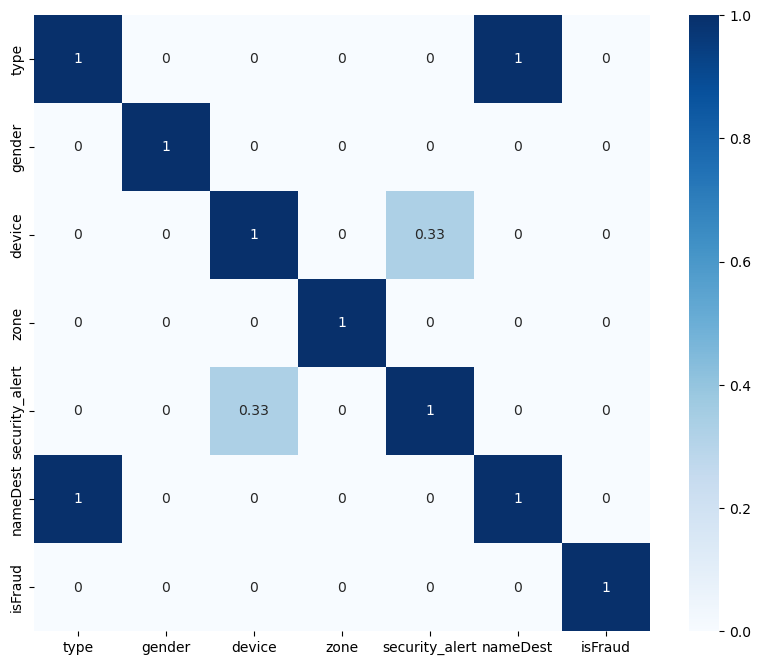

In [31]:
# Plot the heatmap of the Cramer's V matrix

plt.figure(figsize=(10,8))
sns.heatmap(matrix, vmin=0, vmax=1, square=True,annot=True, cmap='Blues')
plt.show()

**Observamos como existe una relación moderada entre las variables `security_alert` y `device`. Además encontramos una correlación muy fuerte entre el `type` y `nameDest`. Esto debemos tenerlo en cuenta para la creación del modelo.**

## 3.5.2 Análisis de las variables numéricas

### Correlación entre variables numéricas

En este apartado procederemos a analizar las **correlaciones existentes entre las diferentes variables numéricas**. Para ello crearemos un dataframe con los valores numéricos.

In [33]:
# Select the numeric variables to save them in the new dataframe 'num_var_df'.

num_var_df = payments_df[['step', 'amount', 'connection_time', 'oldbalanceOrg','age', 'newbalanceOrig', 'user_number','oldbalanceDest','newbalanceDest']]

# Display 'num_var_df'

display(num_var_df)

,step,amount,connection_time,oldbalanceOrg,age,newbalanceOrig,user_number,oldbalanceDest,newbalanceDest
0,1,9839.64,0.140039,170136.00,85,160296.36,138,0.00,0.00
1,1,1864.28,0.496890,21249.00,57,19384.72,909,0.00,0.00
2,1,181.00,0.781150,181.00,66,0.00,2569,0.00,0.00
3,1,181.00,0.565068,181.00,31,0.00,1787,21182.00,0.00
4,1,11668.14,0.517114,41554.00,90,29885.86,3997,0.00,0.00
...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,0.420243,479803.00,39,347245.65,3179,484329.37,616886.72
1048571,95,9917.36,0.376169,90545.00,36,80627.64,2558,0.00,0.00
1048572,95,14140.05,0.837109,20545.00,31,6404.95,1553,0.00,0.00
1048573,95,10020.05,0.480931,90605.00,94,80584.95,642,0.00,0.00


Para medir la correlación entre las diferentes variables numéricas realizaremos una **matriz de correlación mediante el método Pearson.**

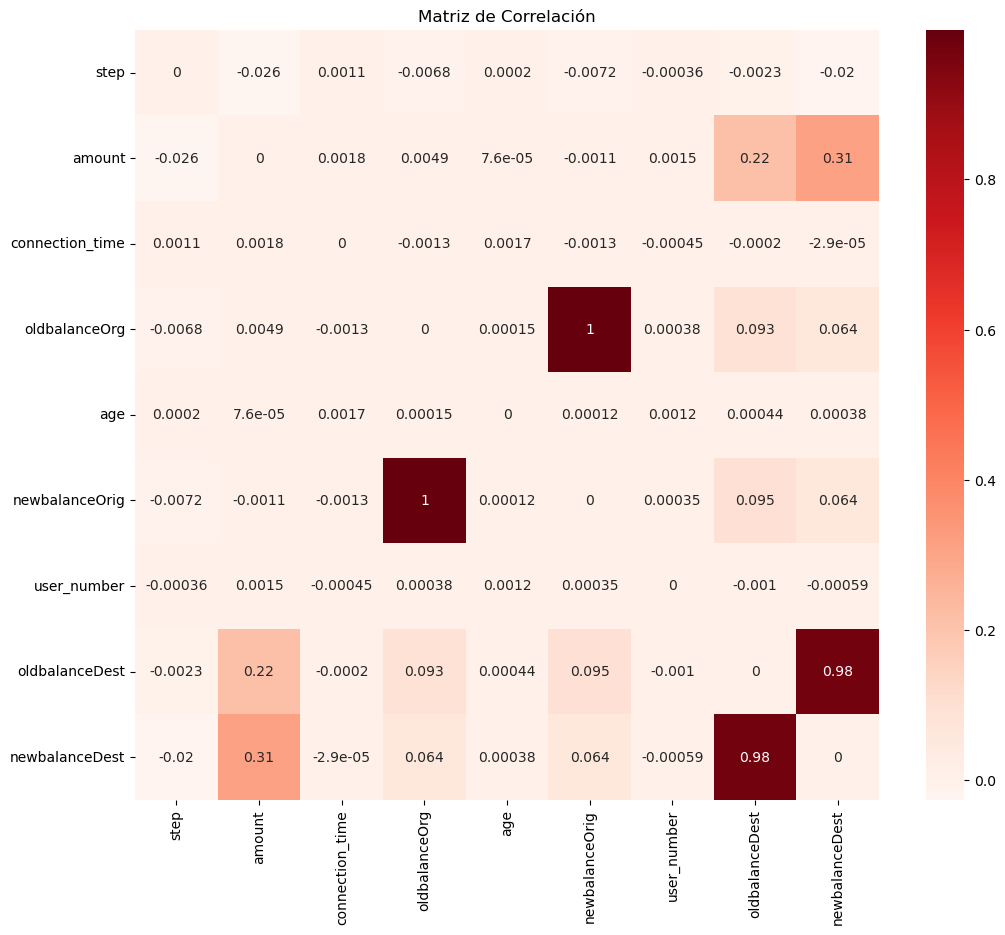

In [34]:
# Display the correlation matrix of the 'num_var_df'. 

get_corr_matrix(dataset = num_var_df, metodo='pearson', size_figure=[12,10])

Las **variables `oldbalanceDest` y `newbalanceDest` están altamente correlacionadas** siendo el saldo antes y después de la transacción. Posteriormente dependiendo del algoritmo que apliquemos se procedería a eliminar estas variables por su alta correlación. 

También observamos como la **variable `amount` tiene una correlación a tener en cuenta entre las dos variables anteriores**, lo cual tiene sentido dado que la cantidad de dinero está relacionado con los movimientos den las cuentas.

## 3.6. Análisis de Outliers

En este apartado realizaremos un estudio de Outliers, es decir, detectar aquellos valores dentro de una muestra que no son consistentes con el resto.

In [35]:
# Display a dataframe with the number of outliers and percentage in a dataset.

get_deviation_of_mean_perc(payments_df, num_var_df.columns, target='isFraud', multiplier=1.5)

,0.0,1.0,Variable,Número de outliers,Porcentaje outliers
0,0.974320,0.025680,step,22586,0.021540
1,0.990036,0.009964,amount,45867,0.043742
2,0.998897,0.001103,connection_time,141484,0.134930
3,0.998812,0.001188,oldbalanceOrg,58947,0.056216
4,0.999072,0.000928,age,131463,0.125373
5,0.999950,0.000050,newbalanceOrig,59807,0.057036
6,0.998826,0.001174,user_number,140512,0.134003
7,0.999421,0.000579,oldbalanceDest,57040,0.054398
8,0.998648,0.001352,newbalanceDest,59187,0.056445


**Observamos como las variables con mayor nº de outliers son  `user_number`, `connection_time` y `age`. Una vez identificados, los tendremos en cuenta para el proceso de crear los modelos de ML, por lo que no los eliminaremos por el momento.**

# <a name="exportacion"> 4. Exportación del dataset transformado <a>

Procedemos a **exportar el dataset que hemos ido transformando durante el EDA**, para posteriormente en el paso de preprocesado, dividirlo en Train, Validación y Test:

In [36]:
# Export 'payments_df' as csv in the folder of processed data.

payments_df.to_csv("../data/processed/payments_df.csv")

[Ir arriba del documento](#top)